# <center> <font color='saddlebrown'>**Sakina_Ariwala_Mini_Project_Clustering**</font>

# <div style = 'background-color:papayawhip'> <center> <font color='saddlebrown'>**Project Description**</font>

**<center> Mall Customers Segmentation**<center/>
            
    Customers who come for shopping in a mall can be grouped in a number of ways. Shopping pattern, spending pattern, shopping score, salary etc are some of the factors that can be used to divide the customers into different categories.

    
    The reason for these clusters is to help identify those customers who would be interested in certain products, offers and services. The store may strategize its offerings in such a way that it targets only right customers for specific products. This helps in creating a win-win situation for both the store (in terms of revenue and more customers through customer recommendation) and the customer (discounts, offers, reward points, gifts, etc).
    
**<center>Business Objective**<center/>
    
                             To create customer cluster to identify the different types of customers


# <div style = 'background-color:papayawhip'> <center> <font color='saddlebrown'>**Importing Libraries**</font>

In [208]:
import numpy as np
import pandas as pd
from numpy import mean, std

#for plotting graphs
import seaborn as sns  
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder,FunctionTransformer

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

import warnings
warnings.filterwarnings("ignore")

# <div style = 'background-color:papayawhip'> <center> <font color='saddlebrown'>**Data Preprocessing**</font>

In [209]:
df = pd.read_csv('DS3_C6_S3_MallCustomers_Data_Project.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
print("\033[1;33mRow's in the dataset:\033[0m",df.shape[0])
print("\033[1;33mColumn's in the dataset:\033[0m", df.shape[1])

Row's in the dataset: 200
Column's in the dataset: 5


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [17]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [18]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [19]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [20]:
for i in df.columns:
    print(df[i].unique())

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200]
['Male' 'Female']
[19 21 20 23 31 22 35 64 30 67 58 24 37 52 25 46 54 29 45 40 60 53 18 49
 42 36 65 48 50 27 33 59 47 51 69 70 63 43 68 32 26 57 38 55 34 66 39 44
 28 56 41]
[ 15  16  17

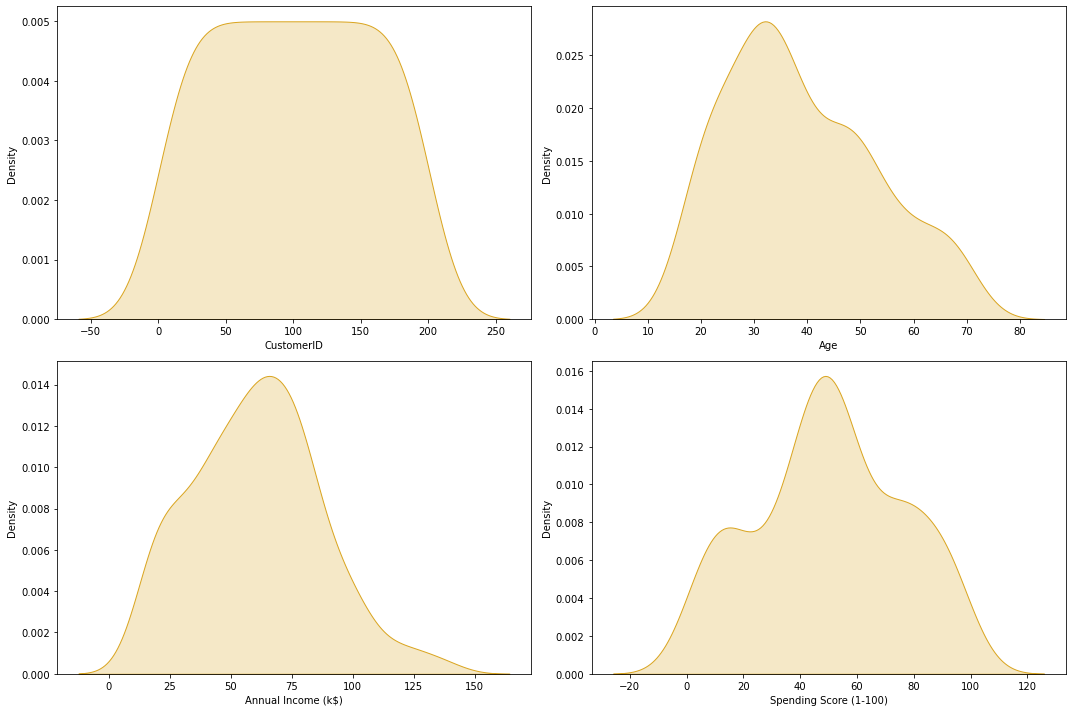

In [35]:
cols = 2
rows = 2
num_cols = df.select_dtypes(exclude='object').columns
fig = plt.figure(figsize= (15,10))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot( rows, cols, i+1)
    
    sns.kdeplot(x=df[col], ax=ax,color="goldenrod",fill=True)
    
fig.tight_layout()  
plt.show()

In [29]:
df.skew()

CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

### Interpretation
- **Spending Score is normally distributed**
- **Age and Annual Income are slightly right skewwed**

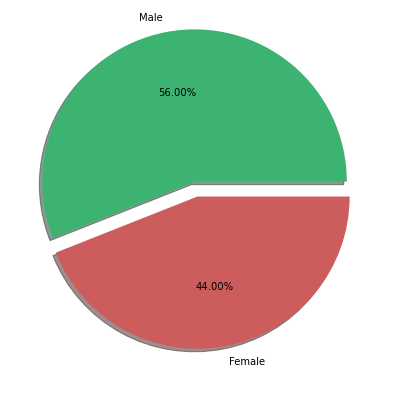

In [55]:
gender = df["Gender"].value_counts()
ex = [0.1,0]

plt.figure(figsize=(10,7))
plt.pie(x=gender,labels=["Male","Female"],autopct="%.2f%%",explode=ex,shadow=True,colors=["mediumseagreen","indianred"])
plt.show()

### Interpretation
- **There are 56% Male and 44% Female**

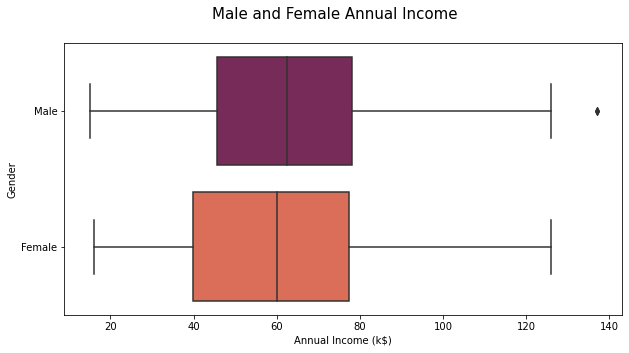

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(y='Gender', x='Annual Income (k$)', data=df, palette="rocket")
plt.suptitle("Male and Female Annual Income",fontsize=15)
plt.show()

### Interpretation

- **The Spread of the boxplot of the annual Income wrt Female is more than Male**


- **We can observe an outlier in annual income spread for males**

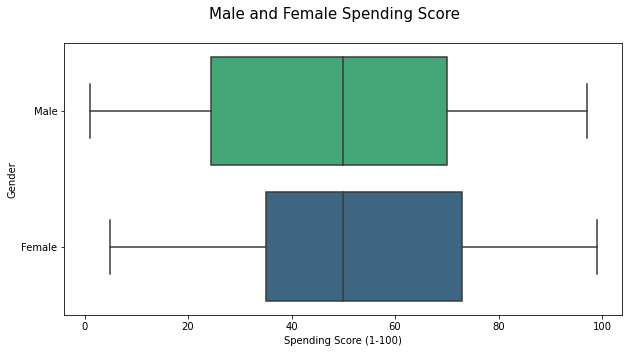

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(y='Gender', x='Spending Score (1-100)', data=df,palette = 'viridis_r')
plt.suptitle("Male and Female Spending Score",fontsize=15)
plt.show()

### Interpretation

- **The spread for spending score is more for Male than Female** 

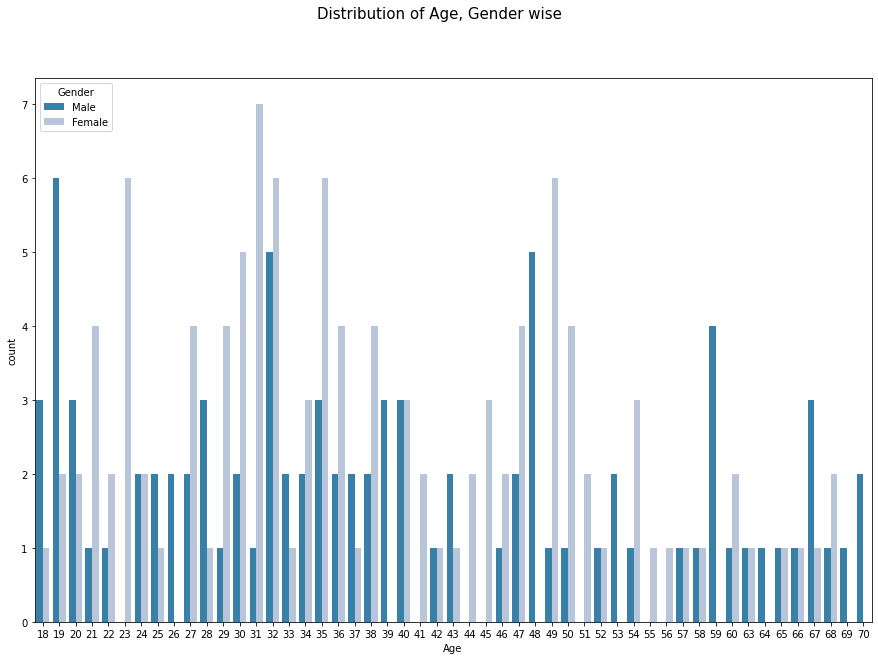

In [30]:
plt.figure(figsize=(15,10))
sns.countplot(hue='Gender', x='Age', data=df, palette="PuBu_r")
plt.suptitle("Distribution of Age, Gender wise",fontsize=15)
plt.show()

### Interpretation

- **The Count of Females for age 31 is the most**


- **For Males the count is highest at the age of 19**

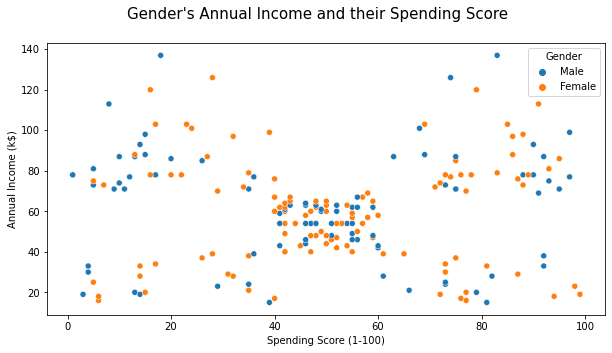

In [76]:
plt.figure(figsize=(10,5))
sns.scatterplot(y="Annual Income (k$)",x="Spending Score (1-100)",hue="Gender",data=df)
plt.suptitle("Gender's Annual Income and their Spending Score",fontsize=15)
plt.show()

### Interpretation

- **When Visualizing the annual income and spending score gender wise we can see some clusters forming as per their income and spending score**


- **There are many male and female whose spending score lie in between 40 to 60 and their annual income is 40 to 70**

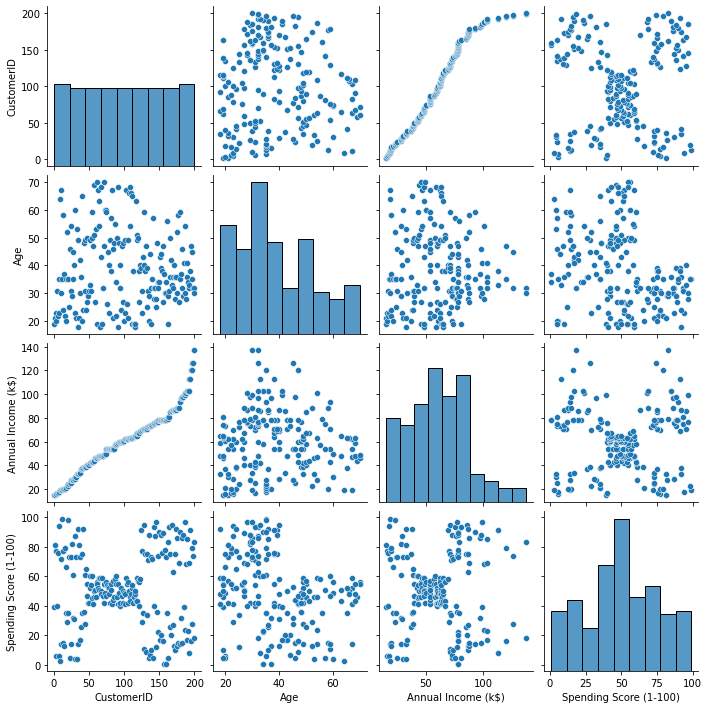

In [56]:
sns.pairplot(df)

In [210]:
df["Gender"] =df["Gender"].astype("category")

In [211]:
encoder = LabelEncoder()
df["Gender"] = encoder.fit_transform(df["Gender"])

In [212]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.to_numpy()), columns=df.columns)
df_scaled.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.019231,0.000000,0.387755
1,0.005025,1.0,0.057692,0.000000,0.816327
2,0.010050,0.0,0.038462,0.008197,0.051020
3,0.015075,0.0,0.096154,0.008197,0.775510
4,0.020101,0.0,0.250000,0.016393,0.397959


# <div style = 'background-color:papayawhip'> <center> <font color='saddlebrown'>**KMean Model**</font>

## Making the model by fitting the whole dataset

In [107]:
df1=df

In [108]:
X = df1;X

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Labels
0,1,1,19,15,39,3
1,2,1,21,15,81,0
2,3,0,20,16,6,3
3,4,0,23,16,77,0
4,5,0,31,17,40,3
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,2
197,198,1,32,126,74,1
198,199,1,32,137,18,2


Text(0.5, 1.0, 'Elbow curve')

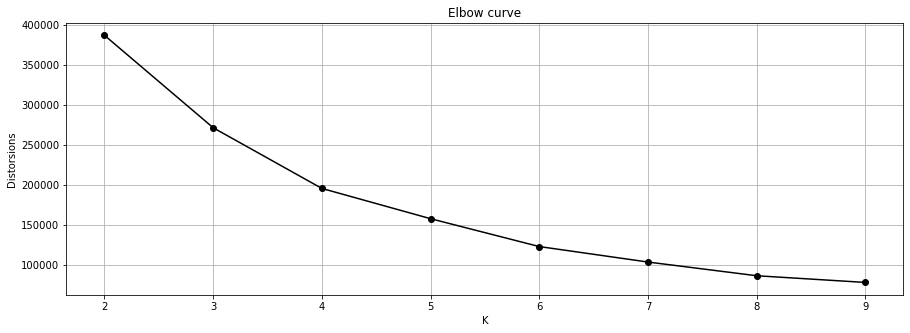

In [85]:
distorsions = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions,marker="o",color="k")
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve')

In [ ]:
### The number of cluster is taken at the elbow point which is 5

In [86]:
km_model = KMeans(n_clusters=5)
km_model.fit(X)

KMeans(n_clusters=5)

In [87]:
label = km_model.labels_
label

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 3, 3, 3, 3, 0, 0, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [88]:
clust_cent = km_model.cluster_centers_
clust_cent

array([[ 26.28      ,   0.4       ,  26.04      ,  27.6       ,
         76.84      ],
       [162.        ,   0.46153846,  32.69230769,  86.53846154,
         82.12820513],
       [162.        ,   0.52631579,  40.39473684,  87.        ,
         18.63157895],
       [ 29.5       ,   0.33333333,  44.1       ,  29.76666667,
         26.83333333],
       [ 89.47058824,   0.44117647,  43.91176471,  56.58823529,
         50.04411765]])

In [89]:
silhouette_score(X,label)

0.4336704604654853

In [90]:
df1["Labels"] = label

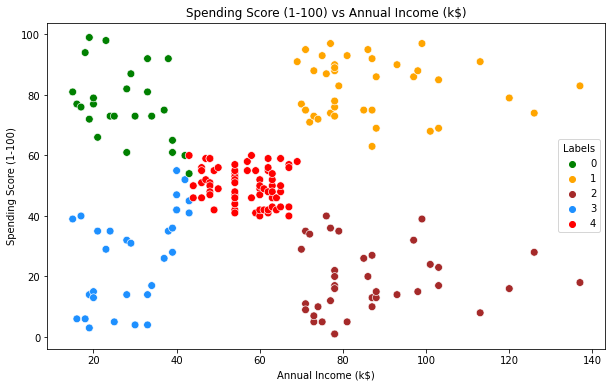

In [97]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="Labels",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df1  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

### Interpretation

- **At k=5 the clusters are forming the best and we can properly identify the customers who are our target**

## Annual Income vs Age

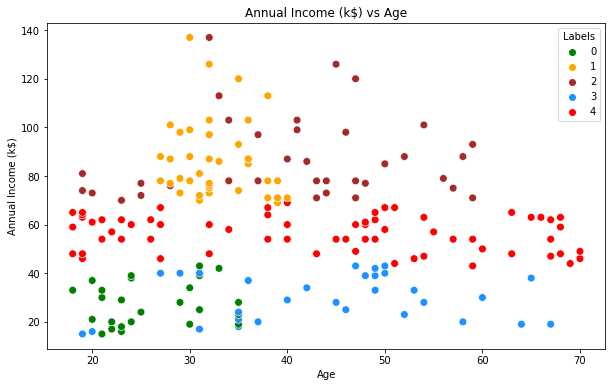

In [95]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Age',y = 'Annual Income (k$)',hue="Labels",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df1  ,s = 60 )
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)') 
plt.title('Annual Income (k$) vs Age')
plt.show()

## Spending Score vs Age

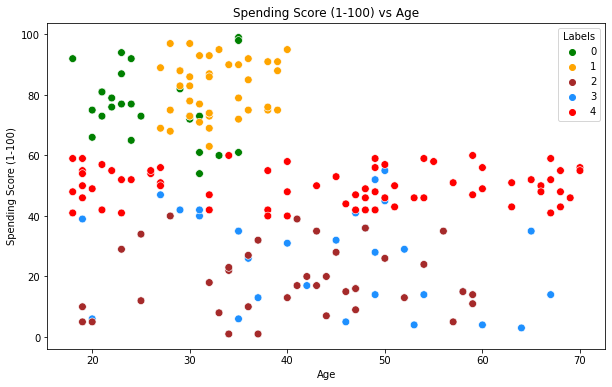

In [96]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Age',y = 'Spending Score (1-100)',hue="Labels",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df1  ,s = 60 )
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Age')
plt.show()

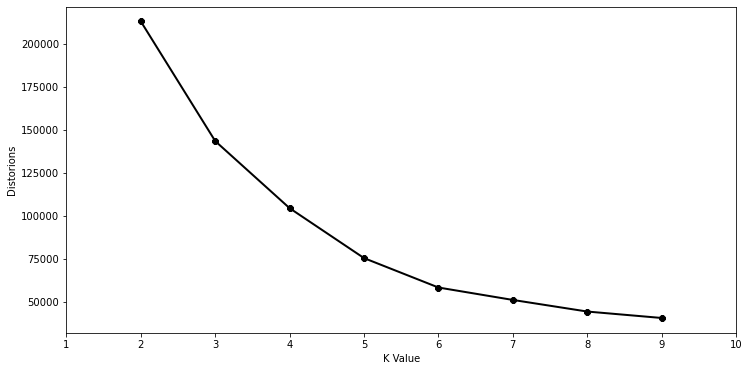

In [141]:
#Taking the features
X2=df[["Age","Annual Income (k$)","Spending Score (1-100)"]]

distorsions = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X2)
    distorsions.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.plot(range(2,10),distorsions, linewidth=2, color="k", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("Distorions")
plt.show()

In [142]:
km2_model = KMeans(n_clusters=5)
km2_model.fit(X2)

KMeans(n_clusters=5)

In [143]:
labels = km2_model.labels_
labels

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [144]:
cluster = km2_model.cluster_centers_
cluster

array([[25.52173913, 26.30434783, 78.56521739],
       [43.08860759, 55.29113924, 49.56962025],
       [32.69230769, 86.53846154, 82.12820513],
       [40.66666667, 87.75      , 17.58333333],
       [45.2173913 , 26.30434783, 20.91304348]])

In [145]:
silhouette_score(X2,labels)

0.44428597560893024

In [149]:
df = df.drop("Labels",axis=1)

In [150]:
df["label"] = label

In [153]:
df2 = df;df2

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,1,19,15,39,3
1,2,1,21,15,81,0
2,3,0,20,16,6,3
3,4,0,23,16,77,0
4,5,0,31,17,40,3
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,2
197,198,1,32,126,74,1
198,199,1,32,137,18,2


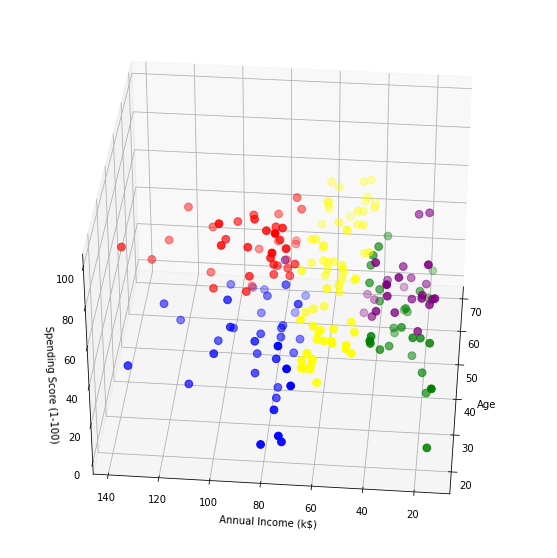

In [154]:
#3D Plot as we did the clustering on the basis of 3 input features
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2.Age[df2.label == 0], df2["Annual Income (k$)"][df2.label == 0], df2["Spending Score (1-100)"][df2.label == 0], c='purple', s=60)
ax.scatter(df2.Age[df2.label == 1], df2["Annual Income (k$)"][df2.label == 1], df2["Spending Score (1-100)"][df2.label == 1], c='red', s=60)
ax.scatter(df2.Age[df2.label == 2], df2["Annual Income (k$)"][df2.label == 2], df2["Spending Score (1-100)"][df2.label == 2], c='blue', s=60)
ax.scatter(df2.Age[df2.label == 3], df2["Annual Income (k$)"][df2.label == 3], df2["Spending Score (1-100)"][df2.label == 3], c='green', s=60)
ax.scatter(df2.Age[df2.label == 4], df2["Annual Income (k$)"][df2.label == 4], df2["Spending Score (1-100)"][df2.label == 4], c='yellow', s=60)
ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [172]:
cust1=df2[df2["label"]==0]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("--------------------------------------------")
cust2=df2[df2["label"]==1]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("--------------------------------------------")
cust3=df2[df2["label"]==2]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("--------------------------------------------")
cust4=df2[df2["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print("--------------------------------------------")
cust5=df2[df2["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["CustomerID"].values)

Number of customer in 1st group= 25
They are - [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 52
 53]
--------------------------------------------
Number of customer in 2nd group= 39
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]
--------------------------------------------
Number of customer in 3rd group= 38
They are - [125 127 129 131 133 135 137 139 141 143 145 147 149 151 153 155 157 159
 161 163 165 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195
 197 199]
--------------------------------------------
Number of customer in 4th group= 30
They are - [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 48 49 50 51 55 56]
--------------------------------------------
Number of customer in 5th group= 68
They are - [ 54  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79 

## Only taking 2 features

In [232]:
x = df[["Annual Income (k$)","Spending Score (1-100)"]]

In [233]:
km3_model = KMeans(n_clusters=5)
km3_model.fit(X2)
labels = km3_model.labels_
print(labels)
cluster = km3_model.cluster_centers_
print(cluster)
print(silhouette_score(X2,labels))
df["label"] = label

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 2 4 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 2 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]
[[25.27272727 25.72727273 79.36363636]
 [32.69230769 86.53846154 82.12820513]
 [42.9375     55.0875     49.7125    ]
 [40.66666667 87.75       17.58333333]
 [45.2173913  26.30434783 20.91304348]]
0.44504314844253573


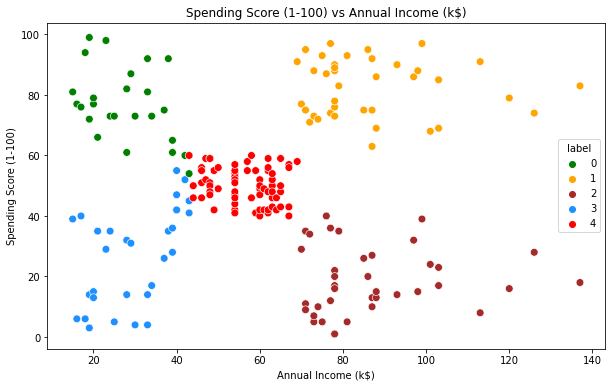

In [221]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [240]:
#df=df.drop("label",axis=1)

In [241]:
x = df[["Annual Income (k$)","Age"]];x

,Annual Income (k$),Age
0,15,19
1,15,21
2,16,20
3,16,23
4,17,31
...,...,...
195,120,35
196,126,45
197,126,32
198,137,32


In [242]:
km4_model = KMeans(n_clusters=5)
km4_model.fit(X2)
labels = km4_model.labels_
print(labels)
cluster = km4_model.cluster_centers_
print(cluster)
print(silhouette_score(X2,labels))
df["label"] = label

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]
[[42.9375     55.0875     49.7125    ]
 [32.69230769 86.53846154 82.12820513]
 [40.66666667 87.75       17.58333333]
 [45.2173913  26.30434783 20.91304348]
 [25.27272727 25.72727273 79.36363636]]
0.44504314844253573


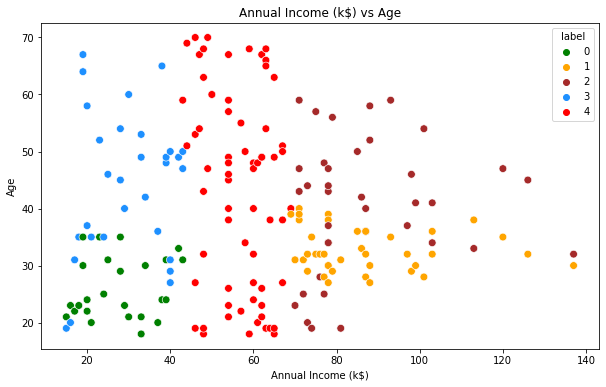

In [243]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Age',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age') 
plt.title('Annual Income (k$) vs Age')
plt.show()

In [244]:
df=df.drop("label",axis=1)

In [247]:
x = df[["Spending Score (1-100)","Age"]]

In [246]:
km5_model = KMeans(n_clusters=5)
km5_model.fit(X2)
labels = km5_model.labels_
print(labels)
cluster = km5_model.cluster_centers_
print(cluster)
print(silhouette_score(X2,labels))
df["label"] = label

[1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 0 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]
[[43.08860759 55.29113924 49.56962025]
 [45.2173913  26.30434783 20.91304348]
 [32.69230769 86.53846154 82.12820513]
 [25.52173913 26.30434783 78.56521739]
 [40.66666667 87.75       17.58333333]]
0.44428597560893024


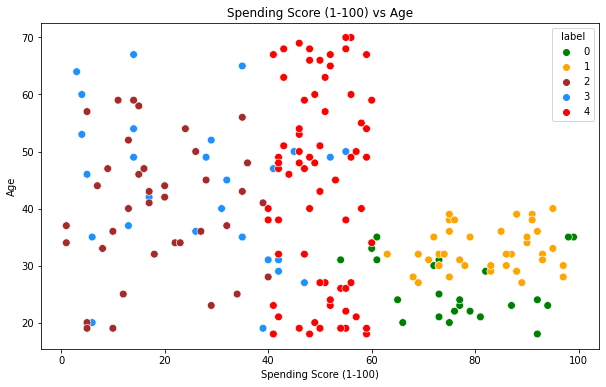

In [248]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Spending Score (1-100)',y = 'Age',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df,s = 60 )
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Age') 
plt.title('Spending Score (1-100) vs Age')
plt.show()

### Using on the k-means clustering we have managed to form different clusters based on different features. Mall management can target the clusters with average spending score to increase their profit and should also maintain good relationship with premium customers with high spending score.They should also work on coming up with new discount schemes to upgrade the customers with low spending score.

# <div style = 'background-color:papayawhip'> <center> <font color='saddlebrown'>**Hierarchical Clustering**</font>

## Making the model by fitting the whole data set

In [ ]:
#Agglomerative Clustering which is a method of clustering which builds a hierarchy of clusters by merging together 
#small clusters, it is a bottom up approach

In [253]:
X1 = df.drop("label",axis=1)
X1 = np.array(X1)

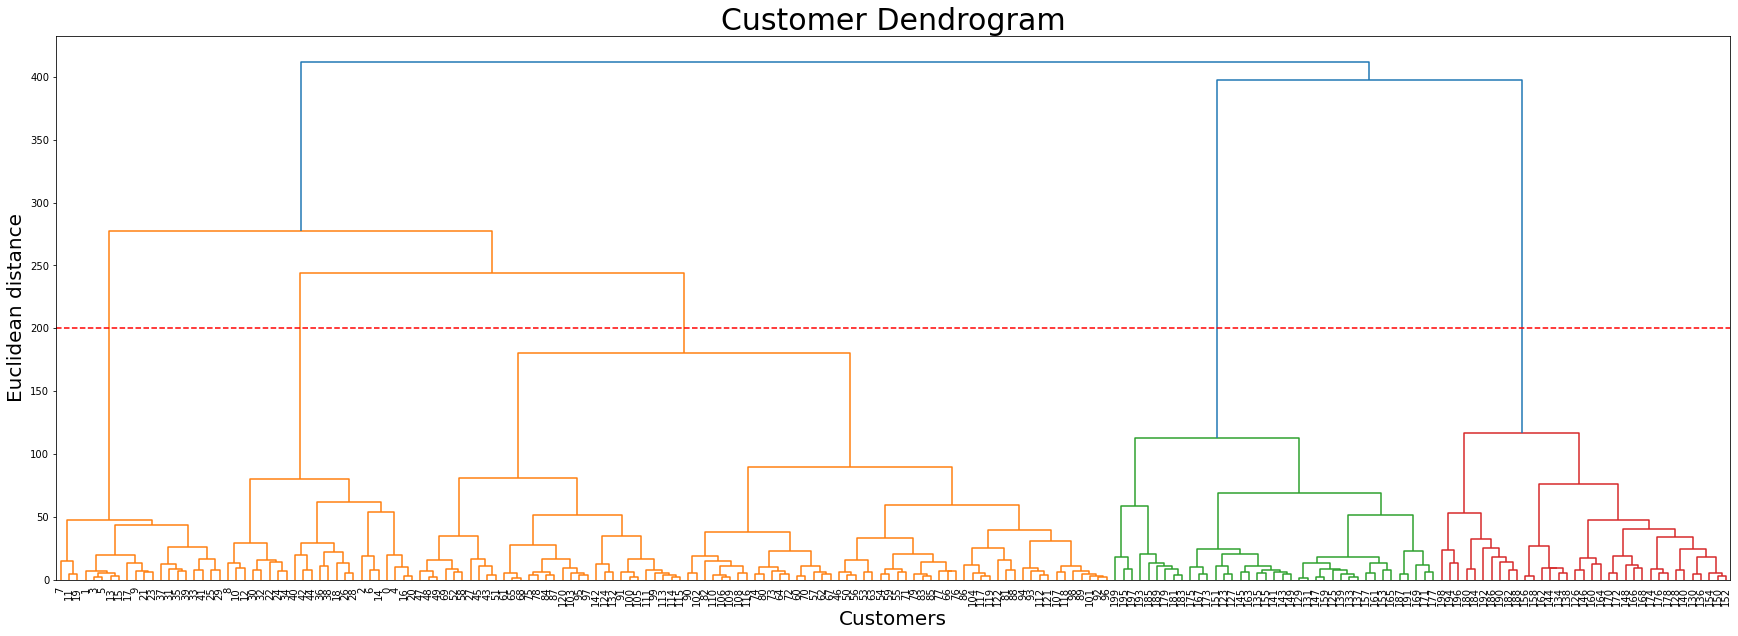

In [256]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'),labels=df.index)
plt.axhline(y=200, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customer Dendrogram',fontsize=30)
plt.xlabel('Customers',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

## Making the model by taking 5 clusters

In [205]:
hc_model = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
hc_label = hc_model.fit_predict(X1)
hc_label

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int64)

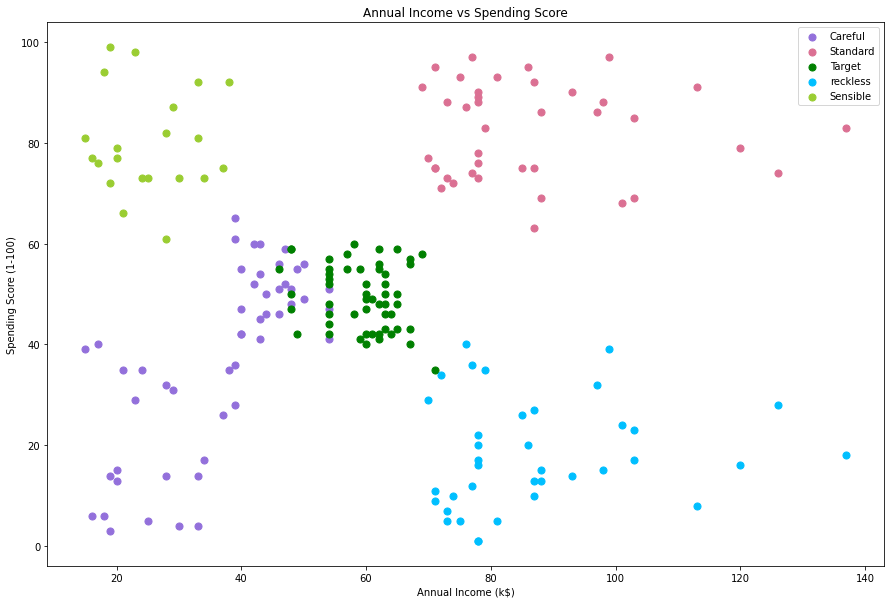

In [206]:
plt.figure(figsize=(15,10))
plt.scatter(X1[hc_label == 0, 3], X1[hc_label == 0, 4], s = 50, c = 'mediumpurple', label = 'Careful')
plt.scatter(X1[hc_label == 1, 3], X1[hc_label == 1, 4], s = 50, c = 'palevioletred', label = 'Standard')
plt.scatter(X1[hc_label == 2, 3], X1[hc_label == 2, 4], s = 50, c = 'green', label = 'Target')
plt.scatter(X1[hc_label == 3, 3], X1[hc_label == 3, 4], s = 50, c = 'deepskyblue', label = 'reckless')
plt.scatter(X1[hc_label == 4, 3], X1[hc_label == 4, 4], s = 50, c = 'yellowgreen', label = 'Sensible')
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Interpretation

- **The Clusters are more properly formed and can be easily identified when we take 5 clusters**

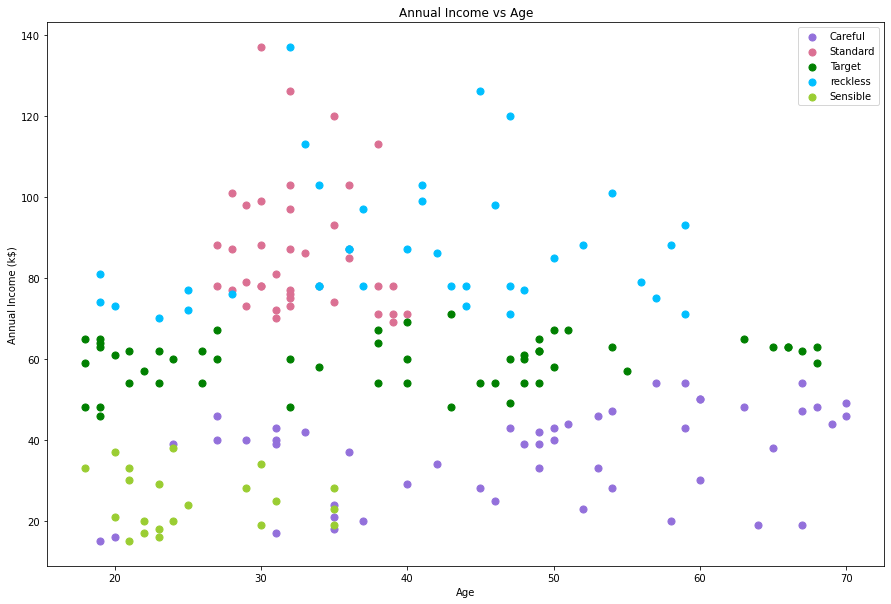

In [207]:
plt.figure(figsize=(15,10))
plt.scatter(X1[hc_label == 0, 2], X1[hc_label == 0, 3], s = 50, c = 'mediumpurple', label = 'Careful')
plt.scatter(X1[hc_label == 1, 2], X1[hc_label == 1, 3], s = 50, c = 'palevioletred', label = 'Standard')
plt.scatter(X1[hc_label == 2, 2], X1[hc_label == 2, 3], s = 50, c = 'green', label = 'Target')
plt.scatter(X1[hc_label == 3, 2], X1[hc_label == 3, 3], s = 50, c = 'deepskyblue', label = 'reckless')
plt.scatter(X1[hc_label == 4, 2], X1[hc_label == 4, 3], s = 50, c = 'yellowgreen', label = 'Sensible')
plt.title('Annual Income vs Age')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

## Taking 3 features

In [266]:
X2 = df.drop("label",axis=1)
X2 = df[['Annual Income (k$)','Spending Score (1-100)','Age']]
X2 = np.array(X2)

In [260]:
hc_model = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
hc_label = hc_model.fit_predict(X2)
hc_label

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

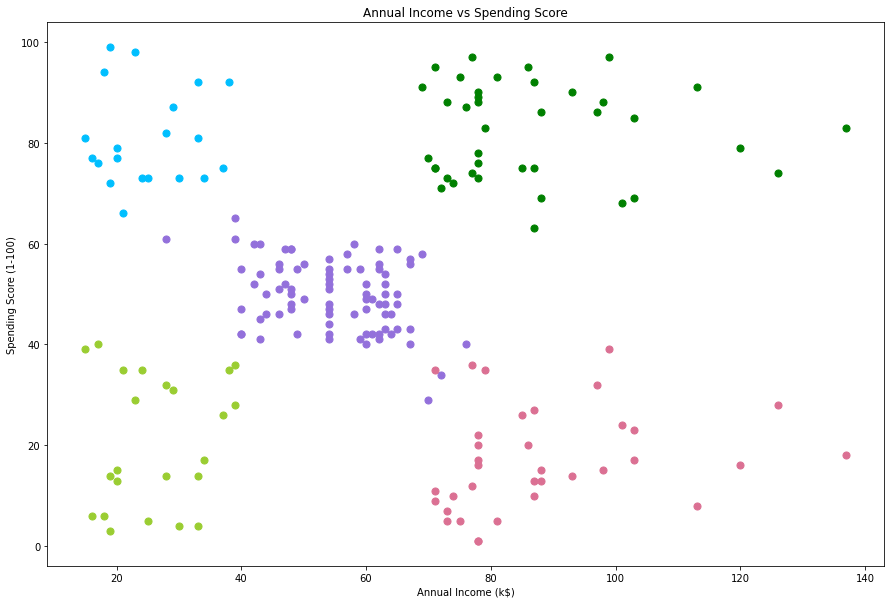

In [263]:
plt.figure(figsize=(15,10))
plt.scatter(X2[hc_label == 0, 0], X2[hc_label == 0, 1], s = 50, c = 'mediumpurple', label = 'Careful')
plt.scatter(X2[hc_label == 1, 0], X2[hc_label == 1, 1], s = 50, c = 'palevioletred', label = 'Standard')
plt.scatter(X2[hc_label == 2, 0], X2[hc_label == 2, 1], s = 50, c = 'green', label = 'Target')
plt.scatter(X2[hc_label == 3, 0], X2[hc_label == 3, 1], s = 50, c = 'deepskyblue', label = 'reckless')
plt.scatter(X2[hc_label == 4, 0], X2[hc_label == 4, 1], s = 50, c = 'yellowgreen', label = 'Sensible')
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
#plt.legend()
plt.show()

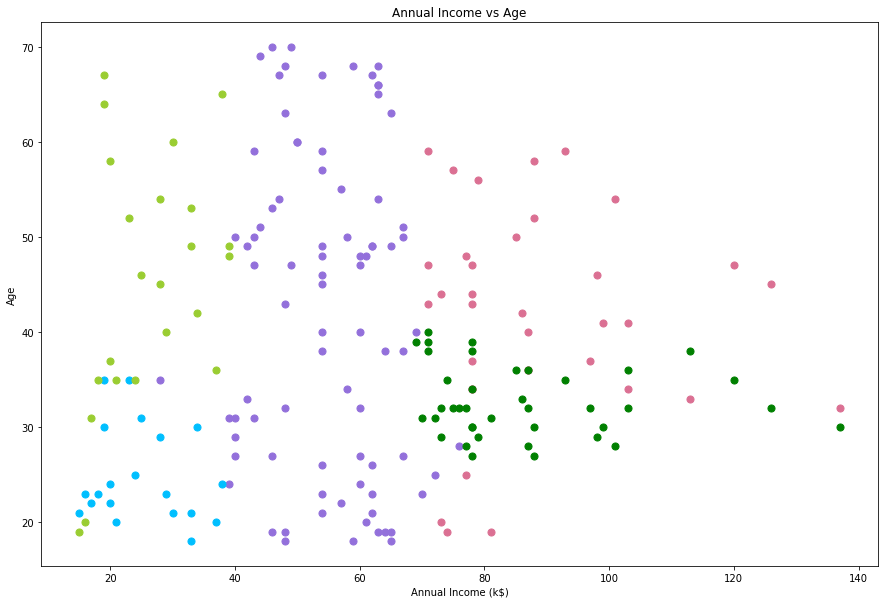

In [264]:
plt.figure(figsize=(15,10))
plt.scatter(X2[hc_label == 0, 0], X2[hc_label == 0, 2], s = 50, c = 'mediumpurple', label = 'Careful')
plt.scatter(X2[hc_label == 1, 0], X2[hc_label == 1, 2], s = 50, c = 'palevioletred', label = 'Standard')
plt.scatter(X2[hc_label == 2, 0], X2[hc_label == 2, 2], s = 50, c = 'green', label = 'Target')
plt.scatter(X2[hc_label == 3, 0], X2[hc_label == 3, 2], s = 50, c = 'deepskyblue', label = 'reckless')
plt.scatter(X2[hc_label == 4, 0], X2[hc_label == 4, 2], s = 50, c = 'yellowgreen', label = 'Sensible')
plt.title('Annual Income vs Age')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
#plt.legend()
plt.show()

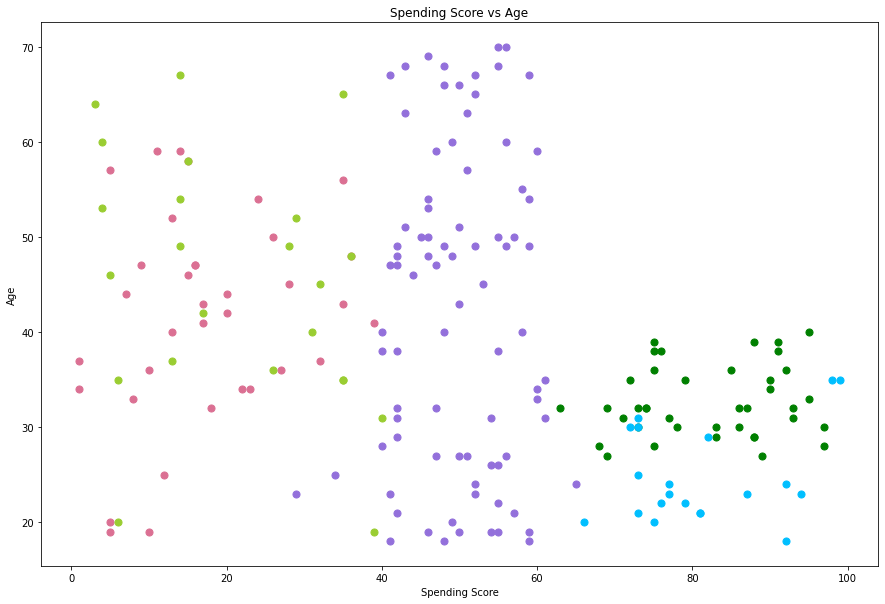

In [265]:
plt.figure(figsize=(15,10))
plt.scatter(X2[hc_label == 0, 1], X2[hc_label == 0, 2], s = 50, c = 'mediumpurple', label = 'Careful')
plt.scatter(X2[hc_label == 1, 1], X2[hc_label == 1, 2], s = 50, c = 'palevioletred', label = 'Standard')
plt.scatter(X2[hc_label == 2, 1], X2[hc_label == 2, 2], s = 50, c = 'green', label = 'Target')
plt.scatter(X2[hc_label == 3, 1], X2[hc_label == 3, 2], s = 50, c = 'deepskyblue', label = 'reckless')
plt.scatter(X2[hc_label == 4, 1], X2[hc_label == 4, 2], s = 50, c = 'yellowgreen', label = 'Sensible')
plt.title('Spending Score vs Age')
plt.xlabel('Spending Score')
plt.ylabel('Age')
#plt.legend()
plt.show()

# <div style = 'background-color:papayawhip'> <center> <font color='saddlebrown'>**Final Conclusion**</font>

### The Clusters are better formed in KMeans than Hierarchical. Identifying our target customers cluster is more accurate in KMeans and the predictions are more better than hierarchical

### We can use KMeans Model for this dataset as it gives accurate customer clusters and it identifies the different types of customers

### In this business objective we can easily see our target cluster customer who spend carefully, recklesly and are sensible in their spending and KMeans will have help us acheive this objective

### Mall management can target the clusters with average spending score to increase their profit and should also maintain good relationship with premium customers with high spending score.They should also work on coming up with new discount schemes to upgrade the customers with low spending score.